# Data Analysis(Climate conditions) of NewYork state
> Complete Data Analysis and Data Visualization......

# Statistics...

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current sessio

> Attributes and Data columns in Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load daily data with explicit date parsing and handling non-numeric values
daily_data = pd.read_csv('/content/daily_data.csv', parse_dates=['DATE'], na_values=['SOD', 'PRECIP', 'other_non_numeric_values'])

# Display the first few rows
print("Daily Data:")
print(daily_data.head())


Daily Data:
       STATION                DATE REPORT_TYPE  SOURCE  BackupElements  \
0  72518014735 2015-01-01 23:59:00       SOD         6             NaN   
1  72518014735 2015-01-02 23:59:00       SOD         6             NaN   
2  72518014735 2015-01-03 23:59:00       SOD         6             NaN   
3  72518014735 2015-01-04 23:59:00       SOD         6             NaN   
4  72518014735 2015-01-05 23:59:00       SOD         6             NaN   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0              260         PLASTIC         42.6918        -73.83109   
1              260         PLASTIC         42.6918        -73.83109   
2              260         PLASTIC         42.6918        -73.83109   
3              260         PLASTIC         42.6918        -73.83109   
4              260         PLASTIC         42.6918        -73.83109   

       BackupName  ...  DailyPeakWindDirection  DailyPeakWindSpeed  \
0  NWS ALBANY, NY  ...                   190.0

> Basic Statistics...

In [3]:

# Basic statistics
print("\nBasic Statistics:")
print(daily_data.describe())



Basic Statistics:
            STATION  SOURCE  BackupElements  BackupElevation  BackupLatitude  \
count  2.668000e+03  2668.0             0.0           2668.0     2668.000000   
mean   7.251801e+10     6.0             NaN            260.0       42.689750   
std    0.000000e+00     0.0             NaN              0.0        0.004187   
min    7.251801e+10     6.0             NaN            260.0       42.681200   
25%    7.251801e+10     6.0             NaN            260.0       42.691800   
50%    7.251801e+10     6.0             NaN            260.0       42.691800   
75%    7.251801e+10     6.0             NaN            260.0       42.691800   
max    7.251801e+10     6.0             NaN            260.0       42.691800   

       BackupLongitude  DailyAverageDewPointTemperature  \
count      2668.000000                      2668.000000   
mean        -73.828268                        38.217766   
std           0.005764                        19.116250   
min         -73.831090  

> Monthly Aggregation...

In [4]:
import pandas as pd

# Load the daily dataset
daily_data = pd.read_csv('/content/daily_data.csv', parse_dates=['DATE'], na_values=['s', 'T', 'M'])
# Create a new column for the month
daily_data['Month'] = daily_data['DATE'].dt.month

# Calculate average temperature and precipitation per month
monthly_aggregations = daily_data.groupby('Month').agg({'DailyAverageDryBulbTemperature': 'mean', 'DailyPrecipitation': 'sum'})

# Display monthly aggregations
print("Monthly Aggregations:")
print(monthly_aggregations)

Monthly Aggregations:
       DailyAverageDryBulbTemperature  DailyPrecipitation
Month                                                    
1                           25.202429               18.36
2                           29.705584               19.94
3                           36.434959               18.76
4                           47.587500               27.35
5                           60.750000               20.62
6                           68.545455               26.96
7                           73.830986               35.11
8                           72.060185               29.82
9                           64.980952               28.02
10                          53.101852               30.46
11                          40.162679               19.91
12                          32.410138               21.28


> Average Daily Temperature..

In [5]:
# Example Pandas query
average_daily_temperature = daily_data.groupby('DATE')['DailyAverageDryBulbTemperature'].mean()
print("Average Daily Temperature:")
print(average_daily_temperature)


Average Daily Temperature:
DATE
2015-01-01 23:59:00    25.0
2015-01-02 23:59:00    32.0
2015-01-03 23:59:00    27.0
2015-01-04 23:59:00    39.0
2015-01-05 23:59:00    27.0
                       ... 
2022-05-27 23:59:00    70.0
2022-05-28 23:59:00    68.0
2022-05-29 23:59:00    66.0
2022-05-30 23:59:00    72.0
2022-05-31 23:59:00    79.0
Name: DailyAverageDryBulbTemperature, Length: 2668, dtype: float64


> Extreme Temperature Days..

In [6]:
# Identify days with extreme temperatures (e.g., above 90°F)
extreme_temperature_days = daily_data[daily_data['DailyMaximumDryBulbTemperature'] > 90]

# Display information about extreme temperature days
print("Extreme Temperature Days:")
print(extreme_temperature_days[['DATE', 'DailyMaximumDryBulbTemperature']])

Extreme Temperature Days:
                    DATE  DailyMaximumDryBulbTemperature
171  2015-07-19 23:59:00                            91.0
180  2015-07-28 23:59:00                            93.0
181  2015-07-29 23:59:00                            95.0
200  2015-08-18 23:59:00                            91.0
220  2015-09-07 23:59:00                            92.0
...                  ...                             ...
1986 2020-07-19 23:59:00                            93.0
1994 2020-07-27 23:59:00                            93.0
2331 2021-06-29 23:59:00                            92.0
2657 2022-05-21 23:59:00                            91.0
2667 2022-05-31 23:59:00                            92.0

[61 rows x 2 columns]


#  Data Visualization Before Merging all datasets......

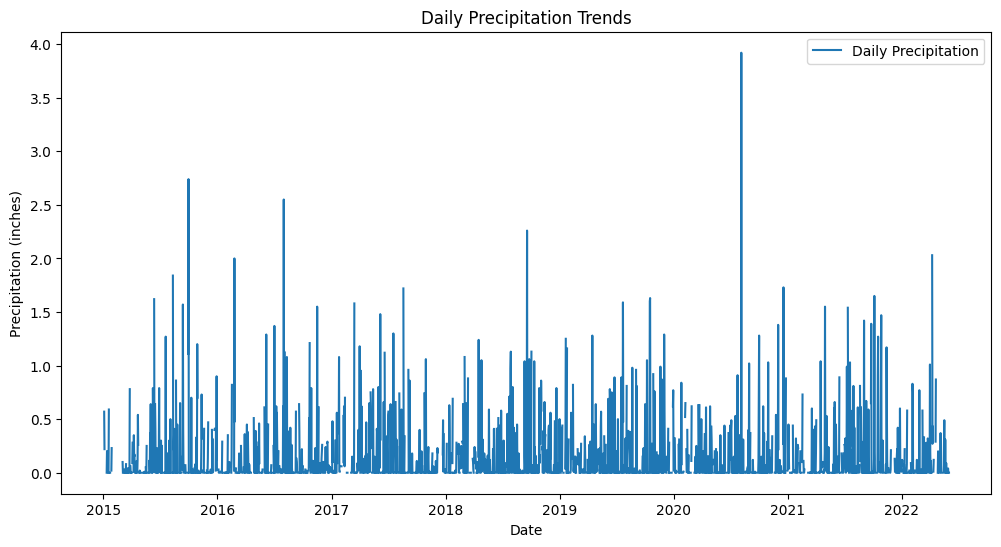

In [7]:
# Visualize precipitation over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyPrecipitation'], label='Daily Precipitation')
plt.title('Daily Precipitation Trends')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.legend()
plt.show()


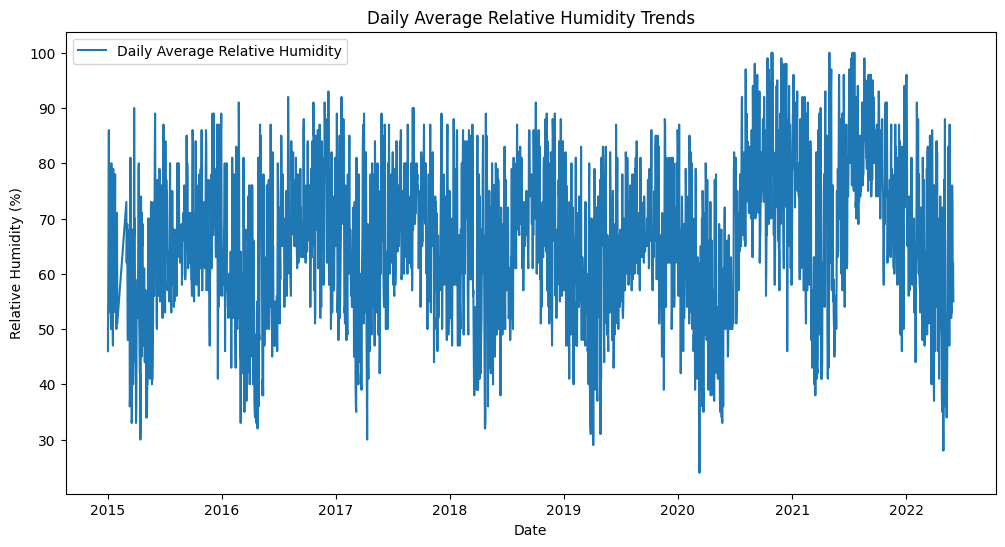

In [8]:

# Visualize humidity over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyAverageRelativeHumidity'], label='Daily Average Relative Humidity')
plt.title('Daily Average Relative Humidity Trends')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()

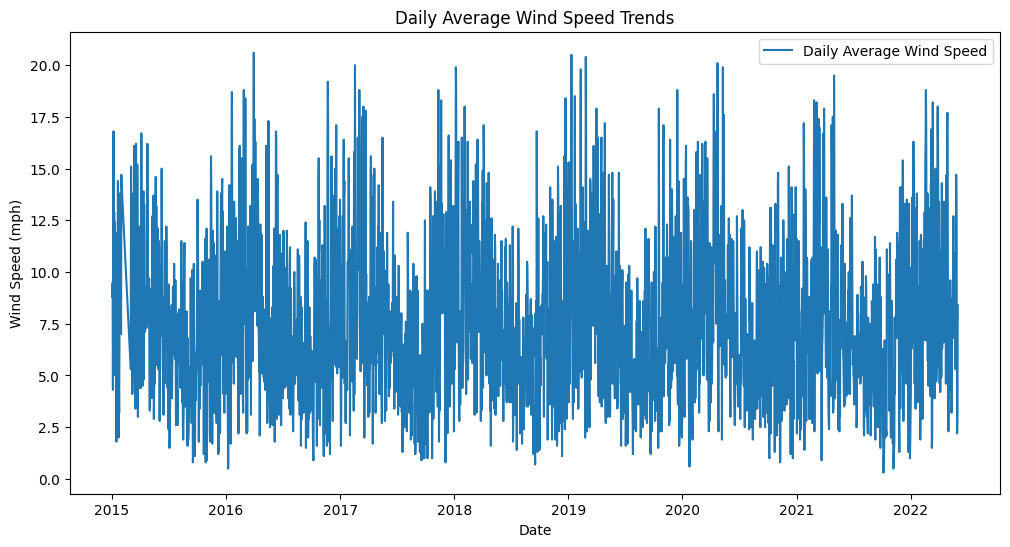

In [9]:
# Visualize wind speed over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyAverageWindSpeed'], label='Daily Average Wind Speed')
plt.title('Daily Average Wind Speed Trends')
plt.xlabel('Date')
plt.ylabel('Wind Speed (mph)')
plt.legend()
plt.show()

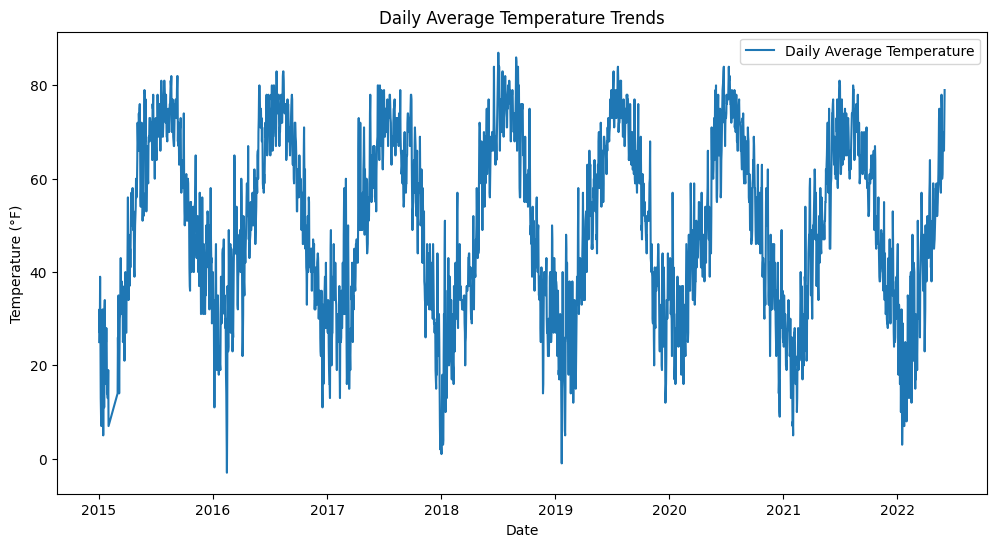

In [10]:

# Visualize trends over time
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['DailyAverageDryBulbTemperature'], label='Daily Average Temperature')
plt.title('Daily Average Temperature Trends')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()

> Distribution of Wind Directions..

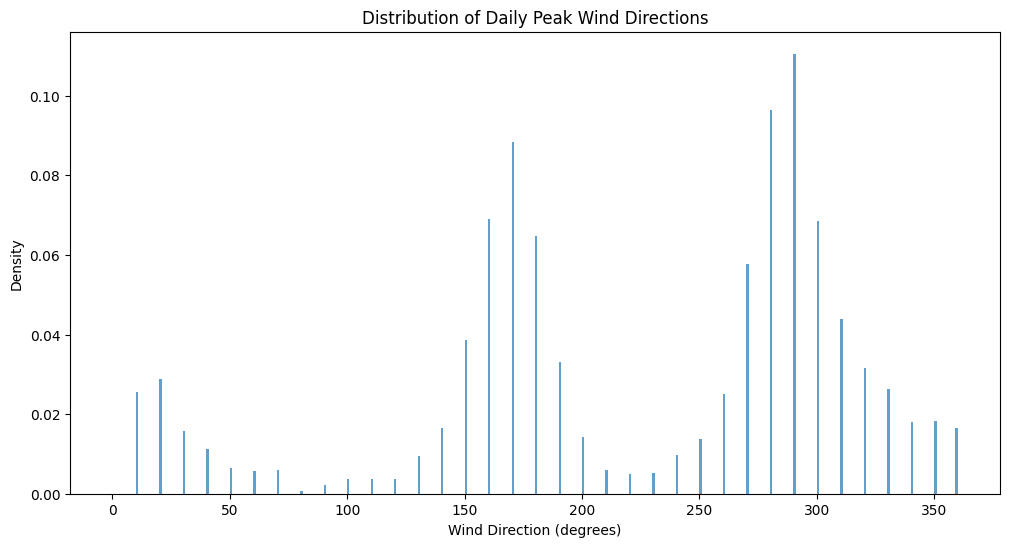

In [11]:
# Visualize distribution of wind directions
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailyPeakWindDirection'].dropna(), bins=360, range=(0, 360), density=True, alpha=0.7)
plt.title('Distribution of Daily Peak Wind Directions')
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Density')
plt.show()


> Trends in Sunrise and Sunset

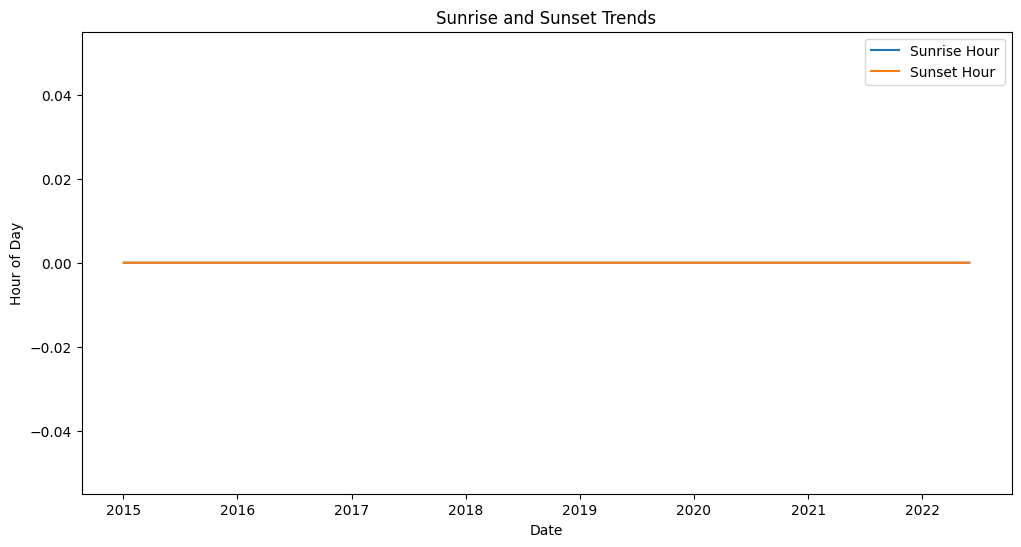

In [12]:
# Load daily data with explicit date parsing and handling non-numeric values
daily_data = pd.read_csv('/content/daily_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])

# Convert 'Sunrise' and 'Sunset' columns to datetime format
daily_data['Sunrise'] = pd.to_datetime(daily_data['Sunrise'], errors='coerce')
daily_data['Sunset'] = pd.to_datetime(daily_data['Sunset'], errors='coerce')

# Extract hour from sunrise and sunset times
daily_data['Sunrise_Hour'] = daily_data['Sunrise'].dt.hour
daily_data['Sunset_Hour'] = daily_data['Sunset'].dt.hour

# Visualize trends in sunrise and sunset times
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['Sunrise_Hour'], label='Sunrise Hour')
plt.plot(daily_data['DATE'], daily_data['Sunset_Hour'], label='Sunset Hour')
plt.title('Sunrise and Sunset Trends')
plt.xlabel('Date')
plt.ylabel('Hour of Day')
plt.legend()
plt.show()

> Distribution of Daily Precipitation.

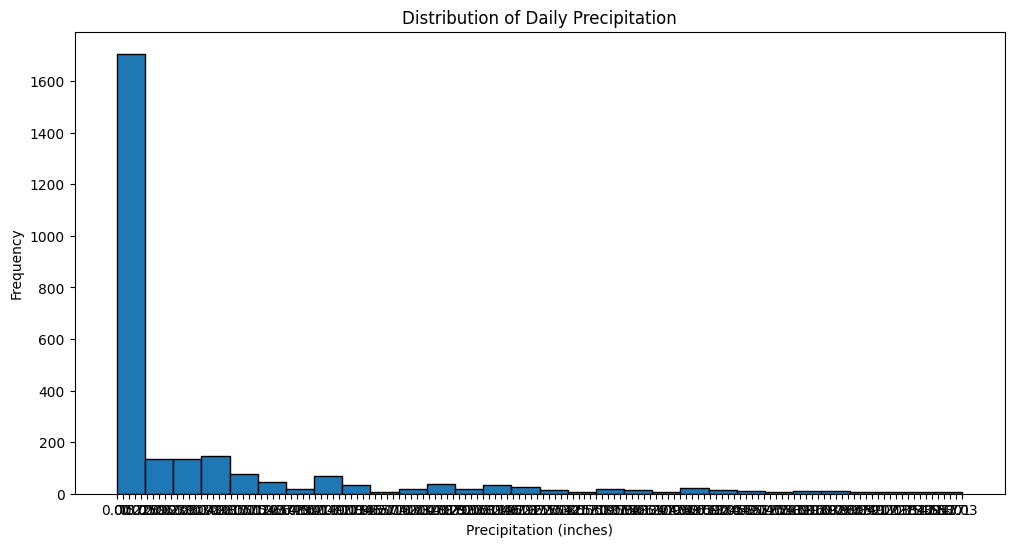

In [13]:
# Visualize the distribution of daily precipitation
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailyPrecipitation'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Daily Precipitation')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.show()


> Montly Average temperature..

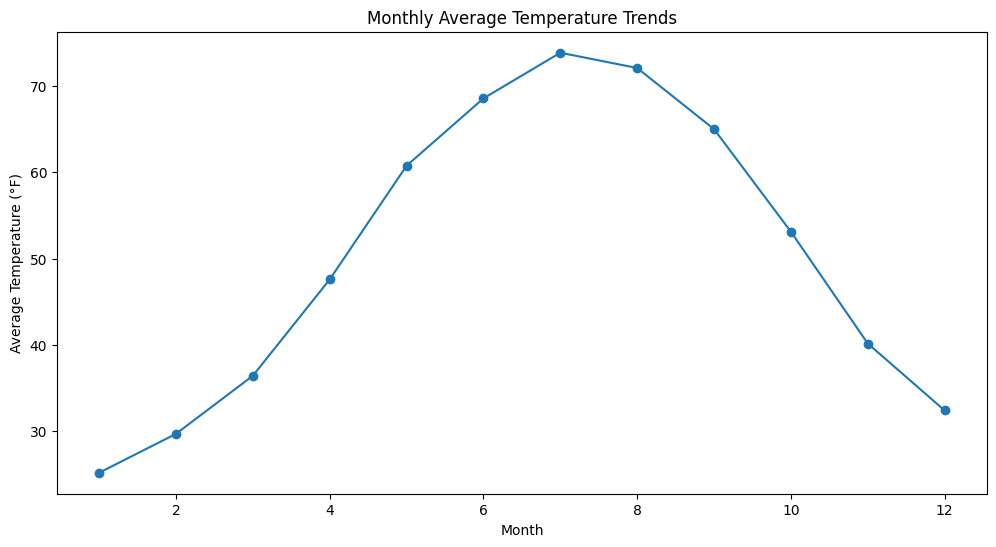

In [14]:
# Create a new column for the month
daily_data['Month'] = daily_data['DATE'].dt.month

# Calculate average temperature per month
monthly_temperature = daily_data.groupby('Month')['DailyAverageDryBulbTemperature'].mean()

# Visualize trends in monthly average temperature
plt.figure(figsize=(12, 6))
plt.plot(monthly_temperature.index, monthly_temperature.values, marker='o')
plt.title('Monthly Average Temperature Trends')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°F)')
plt.show()

> Distribution of daily average wind speed..

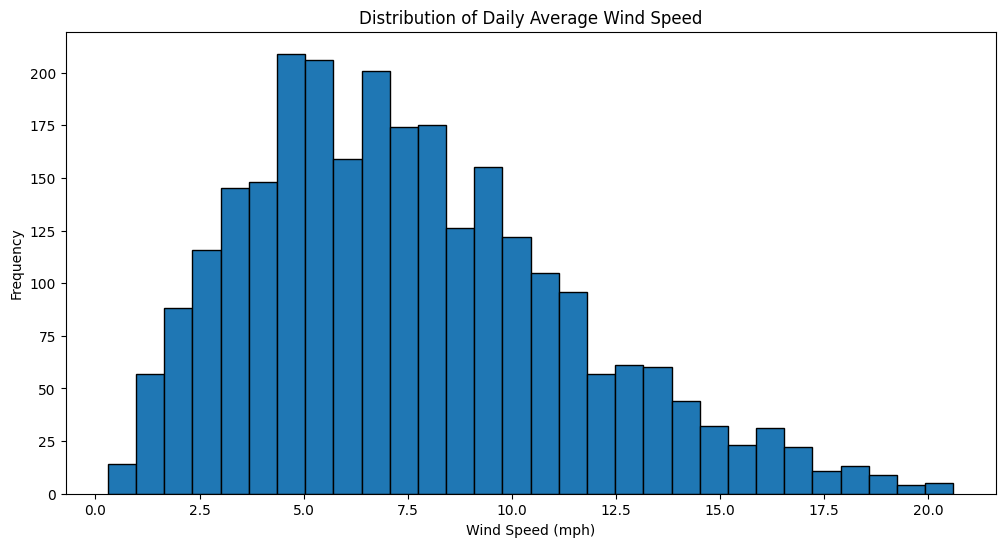

In [15]:
# Visualize the distribution of daily average wind speed
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailyAverageWindSpeed'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Daily Average Wind Speed')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Frequency')
plt.show()


> Daily Temperature Range.

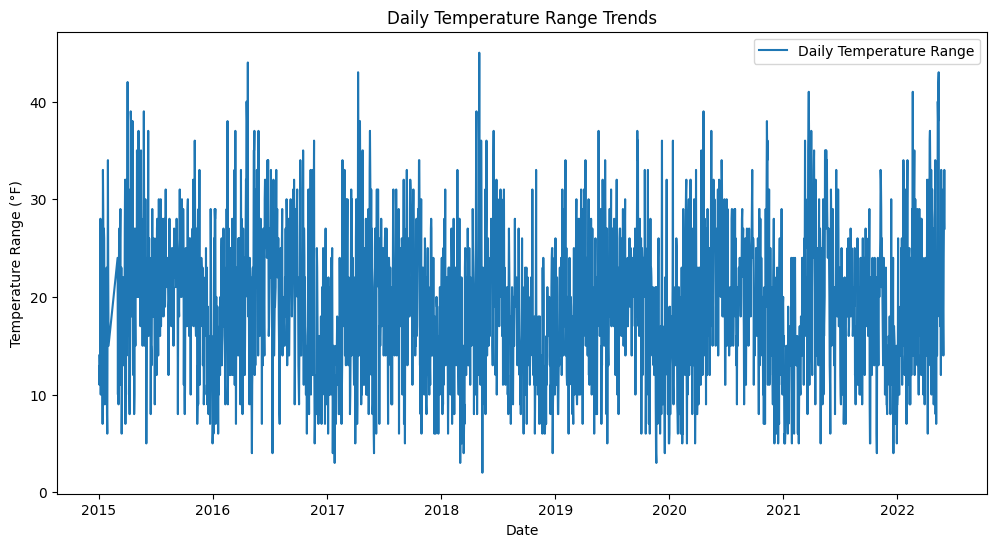

In [16]:
# Calculate daily temperature range
daily_data['TemperatureRange'] = daily_data['DailyMaximumDryBulbTemperature'] - daily_data['DailyMinimumDryBulbTemperature']

# Visualize trends in daily temperature range
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DATE'], daily_data['TemperatureRange'], label='Daily Temperature Range')
plt.title('Daily Temperature Range Trends')
plt.xlabel('Date')
plt.ylabel('Temperature Range (°F)')
plt.legend()
plt.show()


> Seasonal Average Temperature..

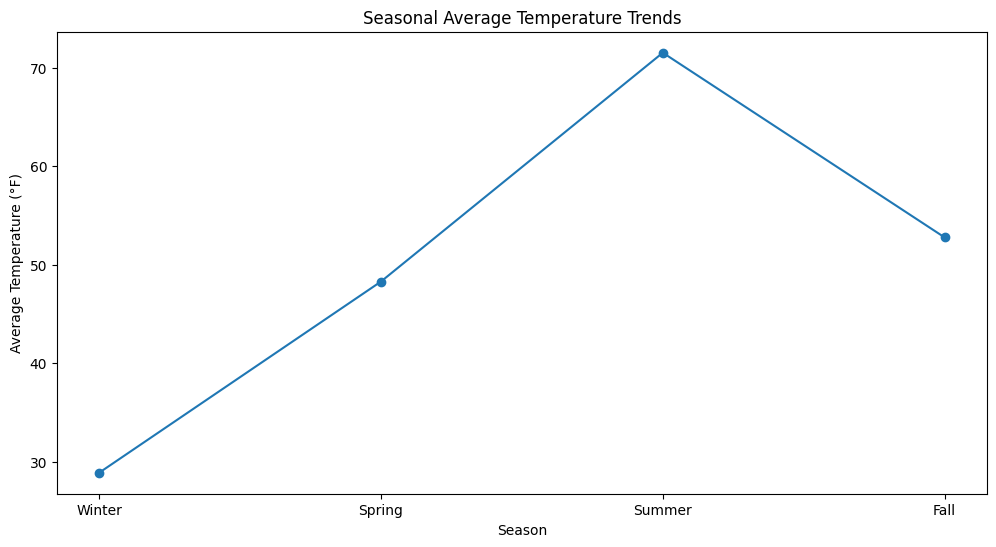

In [17]:
# Extract the season from the date (e.g., Winter, Spring, Summer, Fall)
daily_data['Season'] = (daily_data['DATE'].dt.month % 12 + 3) // 3

# Calculate average temperature per season
seasonal_temperature = daily_data.groupby('Season')['DailyAverageDryBulbTemperature'].mean()

# Visualize trends in seasonal average temperature
plt.figure(figsize=(12, 6))
plt.plot(seasonal_temperature.index, seasonal_temperature.values, marker='o')
plt.title('Seasonal Average Temperature Trends')
plt.xlabel('Season')
plt.ylabel('Average Temperature (°F)')
plt.xticks([1, 2, 3, 4], ['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()


> Daily Snowfall

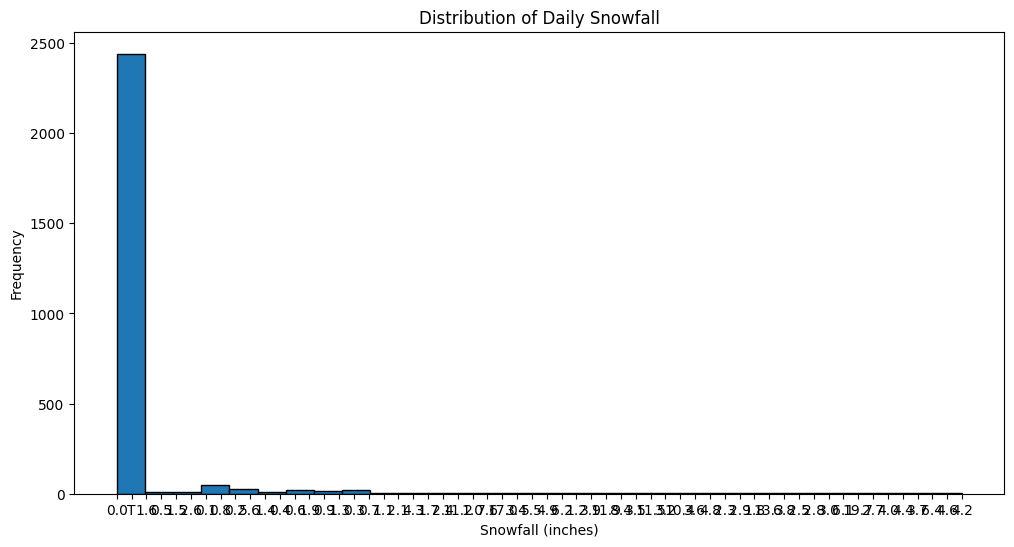

In [18]:
# Visualize the distribution of daily snowfall
plt.figure(figsize=(12, 6))
plt.hist(daily_data['DailySnowfall'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Daily Snowfall')
plt.xlabel('Snowfall (inches)')
plt.ylabel('Frequency')
plt.show()


> Average Monthly Wind Speed..

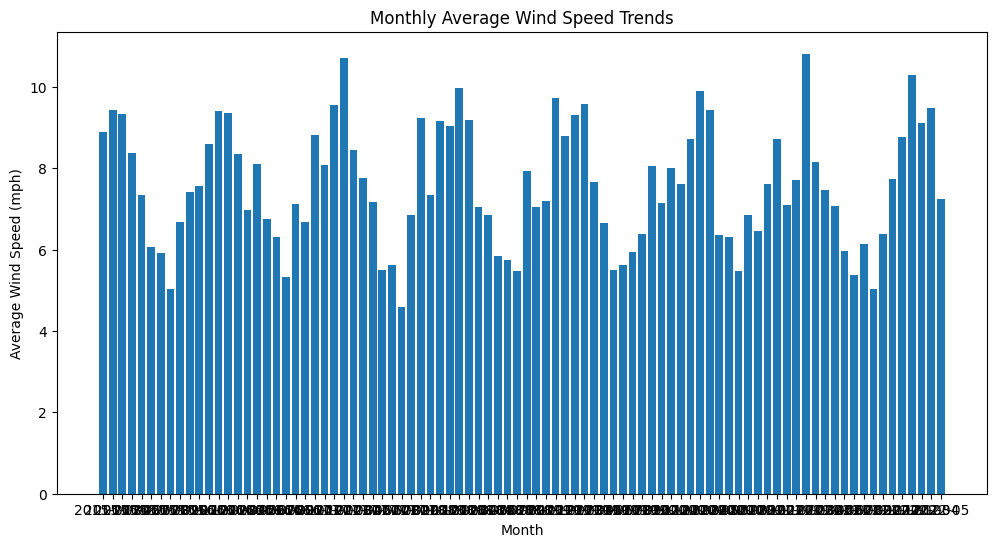

In [19]:
# Calculate average monthly wind speed
monthly_wind_speed = daily_data.groupby(daily_data['DATE'].dt.to_period("M"))['DailyAverageWindSpeed'].mean()

# Visualize trends in monthly average wind speed
plt.figure(figsize=(12, 6))
plt.bar(monthly_wind_speed.index.astype(str), monthly_wind_speed.values)
plt.title('Monthly Average Wind Speed Trends')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (mph)')
plt.show()

> Montly  Precipitation

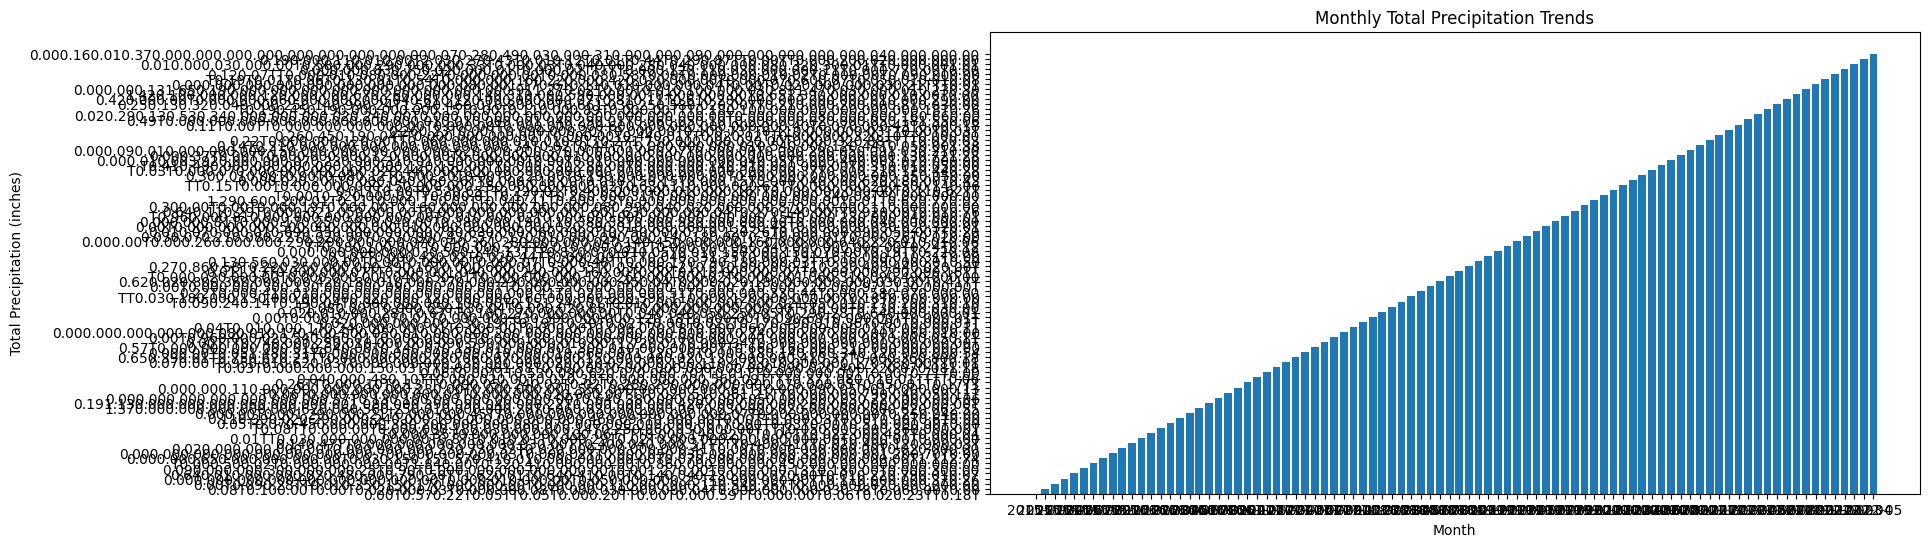

In [20]:
# Calculate total monthly precipitation
monthly_precipitation = daily_data.groupby(daily_data['DATE'].dt.to_period("M"))['DailyPrecipitation'].sum()

# Visualize trends in monthly precipitation
plt.figure(figsize=(12, 6))
plt.bar(monthly_precipitation.index.astype(str), monthly_precipitation.values)
plt.title('Monthly Total Precipitation Trends')
plt.xlabel('Month')
plt.ylabel('Total Precipitation (inches)')
plt.show()


> Daily precipitation VS Daily Average Temperature

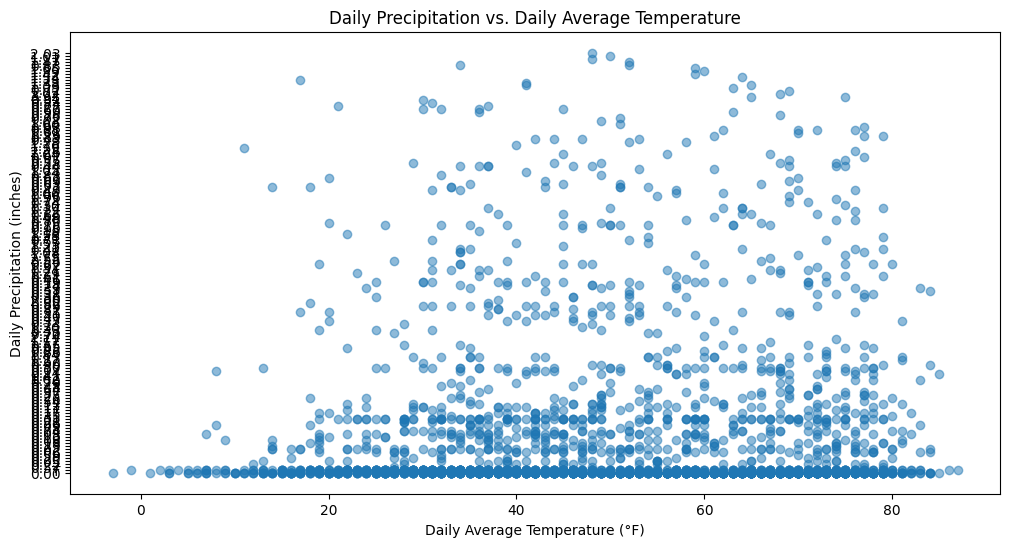

In [21]:
# Scatter plot of daily precipitation vs. daily average temperature
plt.figure(figsize=(12, 6))
plt.scatter(daily_data['DailyAverageDryBulbTemperature'], daily_data['DailyPrecipitation'], alpha=0.5)
plt.title('Daily Precipitation vs. Daily Average Temperature')
plt.xlabel('Daily Average Temperature (°F)')
plt.ylabel('Daily Precipitation (inches)')
plt.show()


# Merging#
> common columns

In [23]:
import pandas as pd

# Load the datasets from Kaggle paths
daily_data = pd.read_csv('/content/daily_data.csv', na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
hourly_data = pd.read_csv('/content/hourly_data.csv', na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
monthly_data = pd.read_csv('/content/monthly_data.csv', na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
three_hour_data = pd.read_csv('/content/three_hour_data.csv', na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])

# Identify common columns among datasets
common_columns = set(daily_data.columns) & set(hourly_data.columns) & set(monthly_data.columns) & set(three_hour_data.columns)

# Print common columns
print("Common columns:", common_columns)


Common columns: {'DATE', 'BackupLongitude', 'BackupElevation', 'BackupElements', 'SOURCE', 'BackupEquipment', 'BackupLatitude', 'WindEquipmentChangeDate', 'REPORT_TYPE', 'BackupName', 'STATION'}


<ipython-input-23-1b39dfd893c4>:5: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  hourly_data = pd.read_csv('/content/hourly_data.csv', na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])


In [25]:
import pandas as pd
# Load the datasets from Kaggle paths
daily_data = pd.read_csv('/content/daily_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
hourly_data = pd.read_csv('/content/hourly_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
monthly_data = pd.read_csv('/content/monthly_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
three_hour_data = pd.read_csv('/content/three_hour_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])
# Merge the datasets based on 'DATE' with different suffixes
merged_data = pd.merge(daily_data, hourly_data, on='DATE', how='outer', suffixes=('_daily', '_hourly'))
merged_data = pd.merge(merged_data, monthly_data, on='DATE', how='outer', suffixes=('_merged', '_monthly'))
merged_data = pd.merge(merged_data, three_hour_data, on='DATE', how='outer', suffixes=('_merged', '_three_hour'))
# Display the merged dataset
print("Merged Dataset:")
print(merged_data.head())
# Identify columns with mixed types in hourly_data
mixed_type_columns = hourly_data.iloc[:, [11, 12]].columns
print("Columns with mixed types in hourly_data:", mixed_type_columns)
# Print data types of those columns
print("Data types of columns with mixed types:")
print(hourly_data[mixed_type_columns].dtypes)

<ipython-input-25-ff9d735f75ee>:4: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  hourly_data = pd.read_csv('/content/hourly_data.csv', parse_dates=['DATE'], na_values=['SOD  ', 'PRECIP', 'other_non_numeric_values'])


Merged Dataset:
   STATION_daily                DATE  REPORT_TYPE_daily  SOURCE_daily  \
0   7.251801e+10 2015-01-01 23:59:00                NaN           6.0   
1   7.251801e+10 2015-01-02 23:59:00                NaN           6.0   
2   7.251801e+10 2015-01-03 23:59:00                NaN           6.0   
3   7.251801e+10 2015-01-04 23:59:00                NaN           6.0   
4   7.251801e+10 2015-01-05 23:59:00                NaN           6.0   

   BackupElements_daily  BackupElevation_daily BackupEquipment_daily  \
0                   NaN                  260.0               PLASTIC   
1                   NaN                  260.0               PLASTIC   
2                   NaN                  260.0               PLASTIC   
3                   NaN                  260.0               PLASTIC   
4                   NaN                  260.0               PLASTIC   

   BackupLatitude_daily  BackupLongitude_daily BackupName_daily  ...  \
0               42.6918              -73

> Datatypes of Columns..

In [26]:
# Identify columns with mixed types in hourly_data
mixed_type_columns = hourly_data.iloc[:, [11, 12]].columns
print("Columns with mixed types in hourly_data:", mixed_type_columns)

# Print data types of those columns
print("Data types of columns with mixed types:")
print(hourly_data[mixed_type_columns].dtypes)


Columns with mixed types in hourly_data: Index(['HourlyDewPointTemperature', 'HourlyDryBulbTemperature'], dtype='object')
Data types of columns with mixed types:
HourlyDewPointTemperature    object
HourlyDryBulbTemperature     object
dtype: object


# After Merging.......

> Check for Missing Values..

In [27]:
# Check for missing values
missing_values = merged_data.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
STATION_daily                          85575
DATE                                       0
REPORT_TYPE_daily                      88243
SOURCE_daily                           85575
BackupElements_daily                   88243
                                       ...  
HourlyVisibility_three_hour            67400
HourlyWetBulbTemperature_three_hour    67400
HourlyWindDirection_three_hour         67400
HourlyWindSpeed_three_hour             67400
WindEquipmentChangeDate_three_hour     67400
Length: 119, dtype: int64


> Summary Statistics...

In [28]:
# Summary statistics
summary_stats = merged_data.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       STATION_daily  REPORT_TYPE_daily  SOURCE_daily  BackupElements_daily  \
count   2.668000e+03                0.0        2668.0                   0.0   
mean    7.251801e+10                NaN           6.0                   NaN   
std     0.000000e+00                NaN           0.0                   NaN   
min     7.251801e+10                NaN           6.0                   NaN   
25%     7.251801e+10                NaN           6.0                   NaN   
50%     7.251801e+10                NaN           6.0                   NaN   
75%     7.251801e+10                NaN           6.0                   NaN   
max     7.251801e+10                NaN           6.0                   NaN   

       BackupElevation_daily  BackupLatitude_daily  BackupLongitude_daily  \
count                 2668.0           2668.000000            2668.000000   
mean                   260.0             42.689750             -73.828268   
std                      0.0         

# Data Visuals..
> Daily Average Temperature over time.

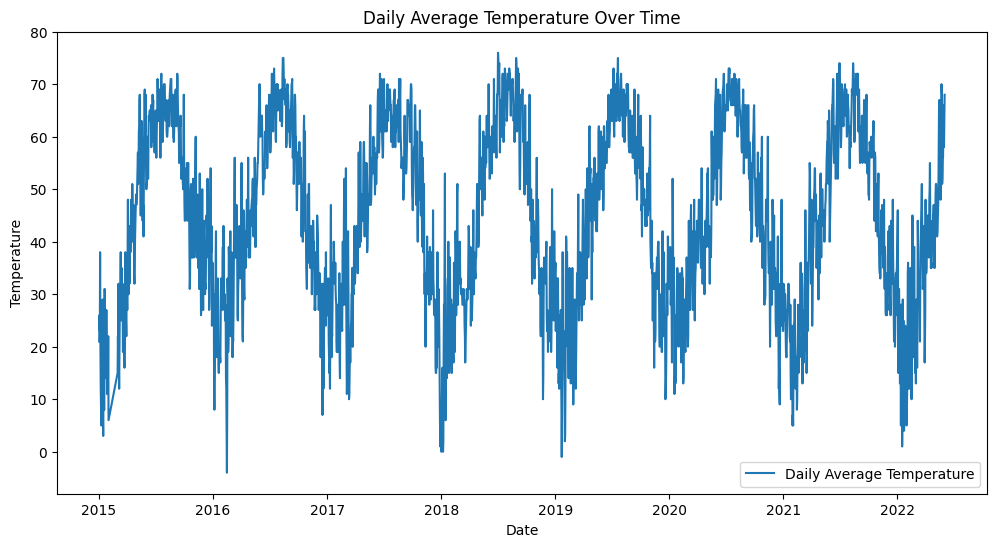

In [ ]:
import matplotlib.pyplot as plt

# Example: Daily Average Temperature over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['DATE'], merged_data['DailyAverageWetBulbTemperature'], label='Daily Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Daily Average Temperature Over Time')
plt.legend()
plt.show()


> Time Series of Daily Average Temperature.

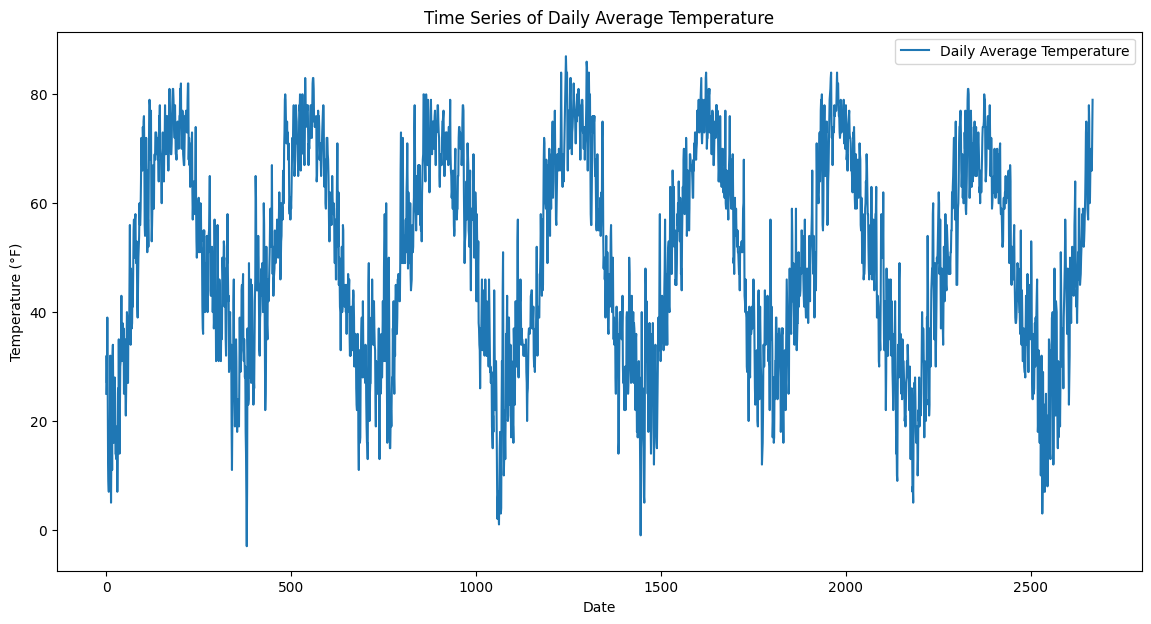

In [29]:


# Assuming you have loaded the merged_data DataFrame

# Plot the time series of daily average temperature
plt.figure(figsize=(14, 7))
plt.plot(merged_data.index, merged_data['DailyAverageDryBulbTemperature'], label='Daily Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title('Time Series of Daily Average Temperature')
plt.legend()
plt.show()

> Distribution of Wind

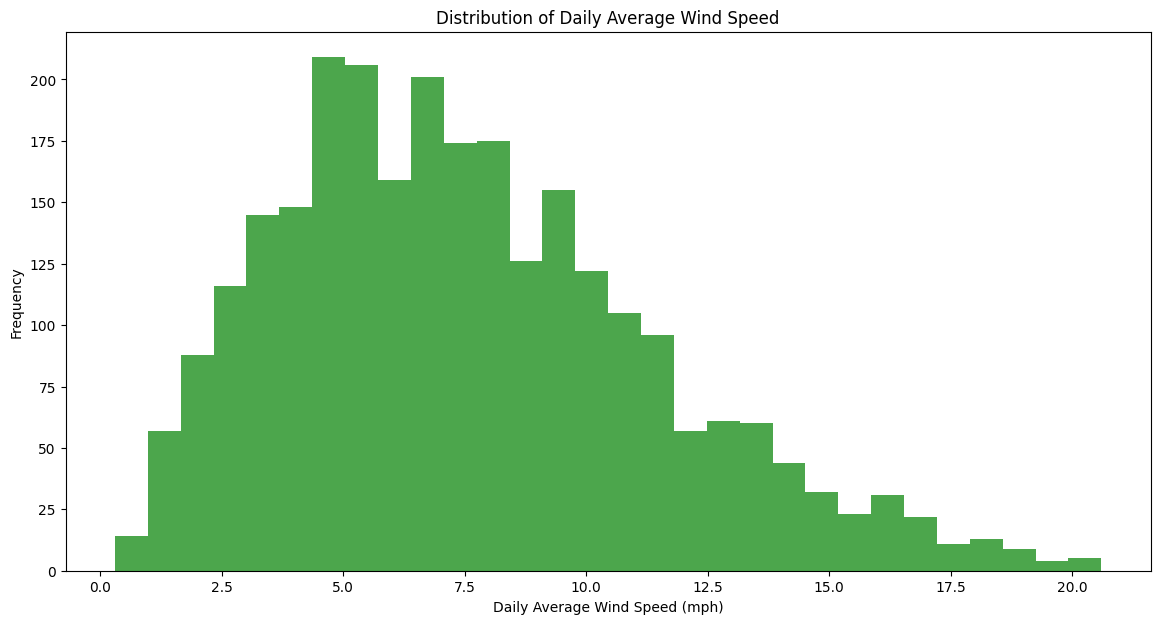

In [30]:
# Analyze and visualize the distribution of wind speed
plt.figure(figsize=(14, 7))
plt.hist(merged_data['DailyAverageWindSpeed'], bins=30, color='green', alpha=0.7)
plt.xlabel('Daily Average Wind Speed (mph)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Average Wind Speed')
plt.show()



> Prevailing Direction..

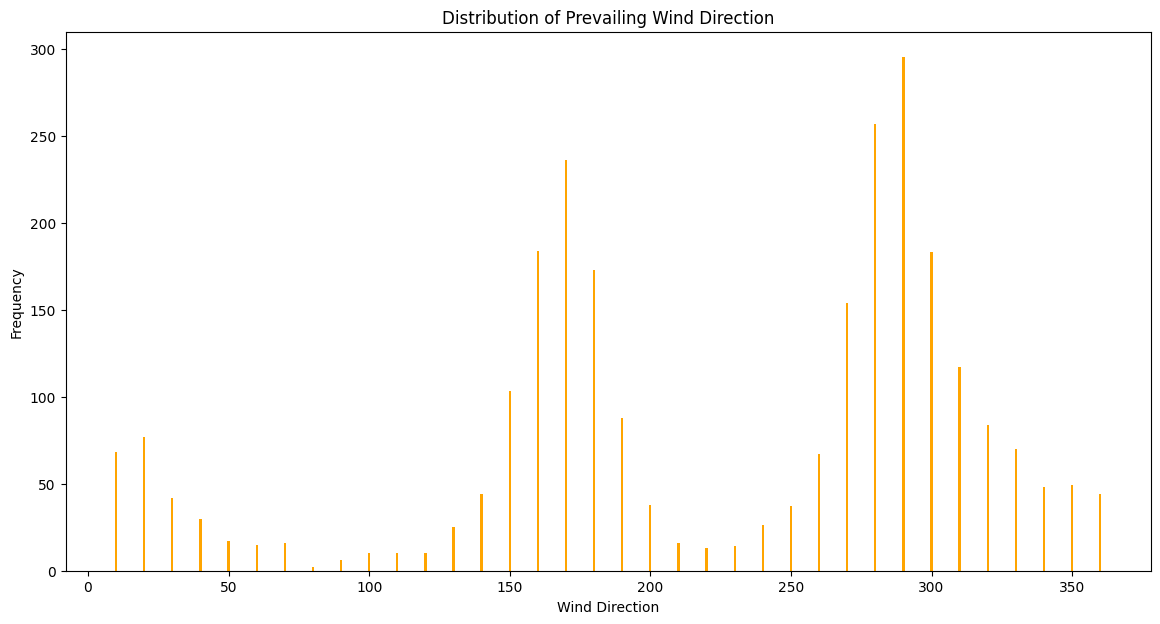

In [31]:
# Identify and visualize the prevailing wind direction
plt.figure(figsize=(14, 7))
plt.bar(merged_data['DailyPeakWindDirection'].value_counts().index, merged_data['DailyPeakWindDirection'].value_counts().values, color='orange')
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.title('Distribution of Prevailing Wind Direction')
plt.show()


> Total Snowfall..

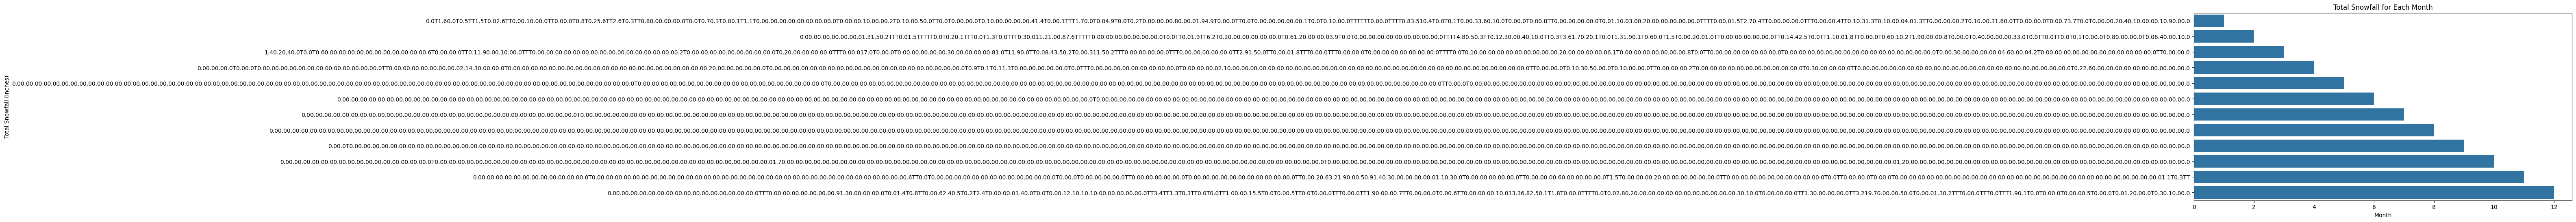

In [32]:

import seaborn as sns
monthly_snowfall = daily_data.groupby(daily_data['DATE'].dt.month)['DailySnowfall'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='DATE', y='DailySnowfall', data=monthly_snowfall)
plt.title('Total Snowfall for Each Month')
plt.xlabel('Month')
plt.ylabel('Total Snowfall (inches)')
plt.show()


> Distribution Of weather sources..

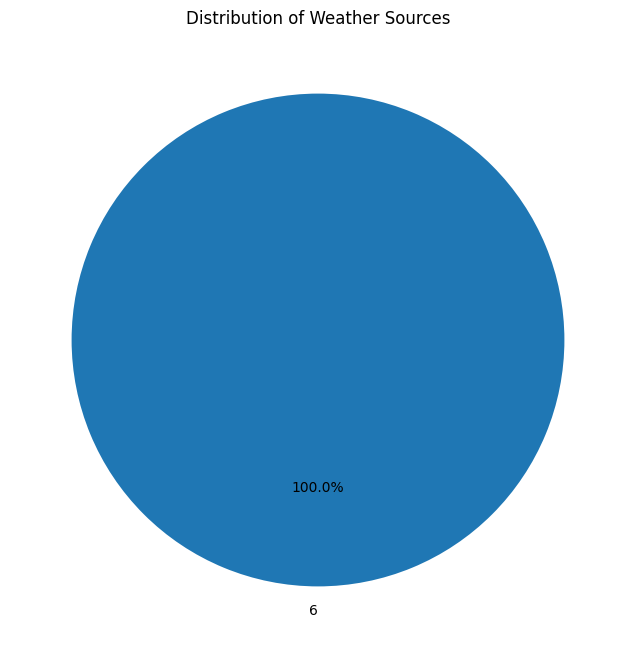

In [33]:
source_distribution = daily_data['SOURCE'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(source_distribution, labels=source_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Weather Sources')
plt.show()


In [34]:
# Check data types of specific columns
print(hourly_data[['HourlyDewPointTemperature', 'HourlyDryBulbTemperature']].dtypes)

HourlyDewPointTemperature    object
HourlyDryBulbTemperature     object
dtype: object


In [35]:
# Unique values in the 'REPORT_TYPE' column for each dataset
unique_conditions_daily = daily_data['REPORT_TYPE'].unique()
unique_conditions_hourly = hourly_data['REPORT_TYPE'].unique()
unique_conditions_three_hour = three_hour_data['REPORT_TYPE'].unique()

# Combine unique conditions from all datasets
all_unique_conditions = set(unique_conditions_daily) | set(unique_conditions_hourly) | set(unique_conditions_three_hour)

# Print the unique weather conditions
print("Unique Weather Conditions:")
for condition in all_unique_conditions:
    print(condition)


Unique Weather Conditions:
FM-15
nan
FM-12


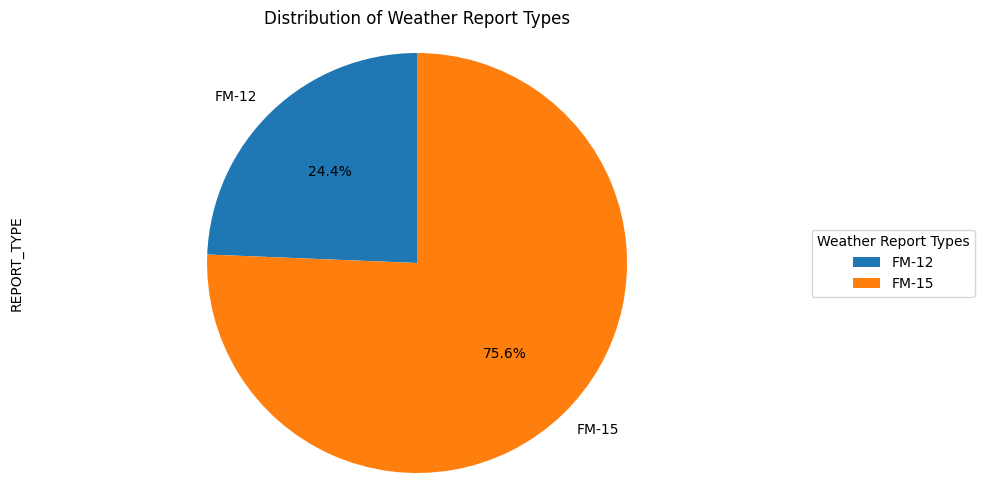

In [36]:
import matplotlib.pyplot as plt

# Assuming daily_data, hourly_data, and three_hour_data are your DataFrames
# Replace 'REPORT_TYPE' with the actual column name in your datasets
report_types_daily = daily_data['REPORT_TYPE'].value_counts()
report_types_hourly = hourly_data['REPORT_TYPE'].value_counts()
report_types_three_hour = three_hour_data['REPORT_TYPE'].value_counts()

# Combine counts from all datasets
combined_report_types = report_types_daily.add(report_types_hourly, fill_value=0)
combined_report_types = combined_report_types.add(report_types_three_hour, fill_value=0)

# Plot the pie chart with previous colors
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors  # Using tab10 colormap for consistent colors
combined_report_types.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)

# Add a legend
plt.legend(combined_report_types.index, title='Weather Report Types', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Weather Report Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
